In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Determining the Drag Force for Pizza (1)

Cd = 1.2 # For thin Disk 
p = 1.225 # Density of Air (kg/m^3)
A = np.pi * (14 * 0.0254)**2 / 4 # Reference Area for a 14 in Pizza

# Fd = (1/2)*Cd*p*A*v^2 

In [160]:
# Determining the Terminal Speed or Mag of Velocity 
# Terminal Speed is when mg = Fd
# Solving for Velocity -> v = sqrt(mg/((1/2)*Cd*p*A))

m = 0.5 #kg based on average weight of 14in pizza
g = 9.807 #m/s based on earth's gravity

vt = np.sqrt((m*g)/(0.5*Cd*p*A)) # Terminal Velocity (in the negative direction)
print('Terminal Velocity = ',vt,' m/s')

Terminal Velocity =  8.196014674219633  m/s


In [161]:
# Graphing Velocity vs Time for pizza pt1

v0 = 1e-12 # Starting velocity ~ 0 m/s
h0 = 40 # Starting height of 13 story building in m
t0 = 0 # Starting time in s
dt = 0.01 # s

N = 10000
# vt = 8.65 # m/s from above

# Solving for Velocity throughout movement
# F_net = mg - Fd -> ma = mg - 0.5*Cd*p*A*v^2
# ma = m*(dv/dt) and k = 0.5*Cd*p*A
# dv/dt = g - (k/m)*v^2
# dv/(V^2-gm/k) = -k/m dt
# Take integral and simplify
# V(t) = vt * tanh(g*t/Vt) -> for easy of work V(t) = vt * C

t = np.arange(0,10,0.01) # Creates array with steps ~ dt
#Cin = np.array([g*t/vt]) # Creates array for our values w/in tanh 
C = np.tanh(g*t/vt) # Creates array for our hyperbolic tangent
v = vt*C 

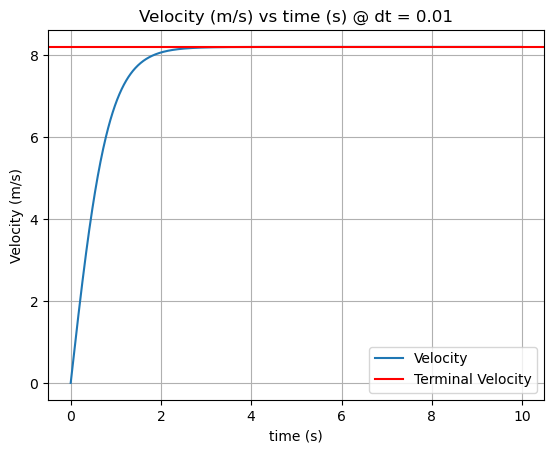

In [162]:
# Graphing V vs t pt 2
plt.plot(t,v, label = 'Velocity') # plots v array and t array
plt.axhline(y=vt, color = 'red',label = 'Terminal Velocity') # creates an asymptote at the terminal velocity
plt.xlabel('time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity (m/s) vs time (s) @ dt = 0.01')
plt.grid()
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

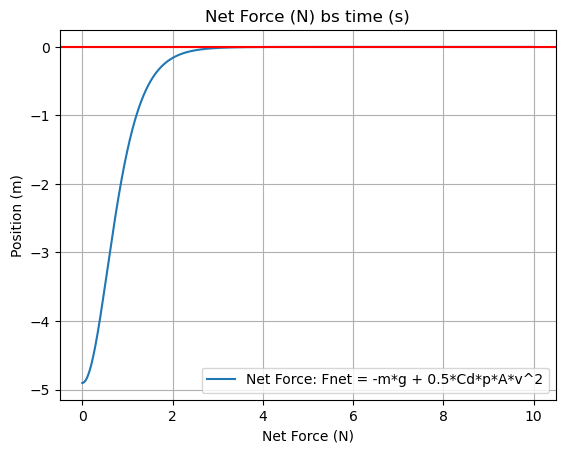

In [163]:
# Graphing Net Force

fnet =  -m*g + 0.5*Cd*p*A*v**2
plt.plot(t,fnet, label = 'Net Force: Fnet = -m*g + 0.5*Cd*p*A*v^2')
plt.axhline(y=0, color = 'red') # Zero line for referance
plt.xlabel('Net Force (N)')
plt.ylabel('Position (m)')
plt.title('Net Force (N) bs time (s)')
plt.grid()
plt.legend()
plt.show

In [164]:
# Graphing Motion of Pizza pt1

h = np.zeros(len(t)) # Creates aray of zeros @ len(t)
h[0] = h0 # Sets first value of h as h0
a = h0 # Creates a non aray value for while loop
b = 0 # Creates indexing variable 
dt = 0.01 # sets dt
while a > 0: # while loop to place in values for h aray
    h[b+1] = h[b] - v[b]*dt - 0.5*(fnet[b]/m)*dt**2 # Use netforce / m  for a
    b += 1
   # t1 = np.append(t1,b)
    a = h[b]

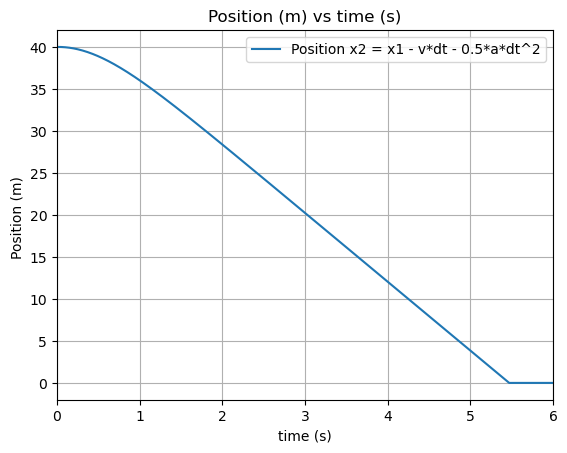

In [165]:
#graphing motion pt2
plt.plot(t,h,label = 'Position x2 = x1 - v*dt - 0.5*a*dt^2')
plt.xlabel('time (s)')
plt.ylabel('Position (m) ')
plt.title('Position (m) vs time (s)')
plt.xlim(0,6)
plt.grid()
plt.legend()

In [166]:
# Ranger 7 Mission

G = 6.67*10**(-11) # m^3/kg*s^2 Newtonian Grav
me = 5.97219*10**24 #kg Earth Mass
mm = 7.34767309*10**22 # kg Moon Mass
re = 6.371e6 # m Earth Radius
rm = 1.74e6 # m Moon Radius
rem = 3.84e8 # m Earth to Moon radius
mr = 364 #kg


In [167]:
# First Force Diagram (Rocket taking off fighting against Earth's grav)

def fg(pos): # Defines a function for net gravity force
    rem = 3.84e8 - pos # m Earth to Moon radius
    fe = (G*me*mr)/(pos + re)**2
    fm = (G*mm*mr)/(rm + rem)**2
    fg = -fe + fm
    return fg

# Force from rocket at Vo = 10^4 m/s
# From F = ma -> F = m * delta(V)
# F = m(V-Vo)

#In order to take off, our Force of our rocket needs to be larger than our net gravity force. 
# If our grav force is negative than our Fr needs to be positive
# Fnet > 0 based on incramental changes in v to find minimum velocity

pos = 0 
v1 = 0
vo = 10e4

In [168]:
# Finding the potential energy TILL point of no return 

def unet(pos):
    rem = 3.84e8 - pos
    unet = -((G*me*mr)/(pos+re) + (G*mm*mr)/(rm + rem))
    return unet

y = np.arange(0,rem-rm,1e2)
unet1 = unet(y)

pnr = max(unet1) # Point of no return
#pnr1 = max(unet1,len(unet1))
print(min(unet1))

-22763627445.358124


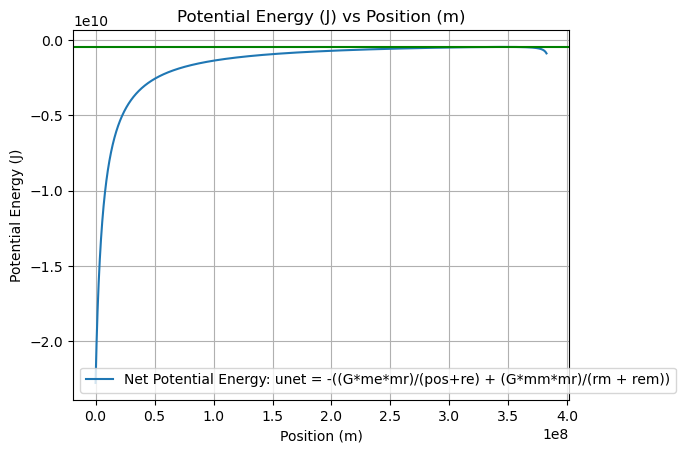

In [169]:
plt.plot(y,unet1, label = 'Net Potential Energy: unet = -((G*me*mr)/(pos+re) + (G*mm*mr)/(rm + rem))')
plt.axhline(pnr, color = 'green')
plt.ylabel('Potential Energy (J)')
plt.xlabel('Position (m)')
plt.title('Potential Energy (J) vs Position (m)')
plt.legend()
plt.grid()
plt.show()

In [170]:
# Finding Kinetic Energy TILL point of no return 
# We can define KE by -> Total Energy = KE + UE = 0
# We know UE which does not equal zero so our KE must be the opposite of our UE. 

In [171]:
KE = max(unet1) - unet1
print(KE)

[2.23072575e+10 2.23069003e+10 2.23065431e+10 ... 4.29307228e+08
 4.29321861e+08 4.29336494e+08]


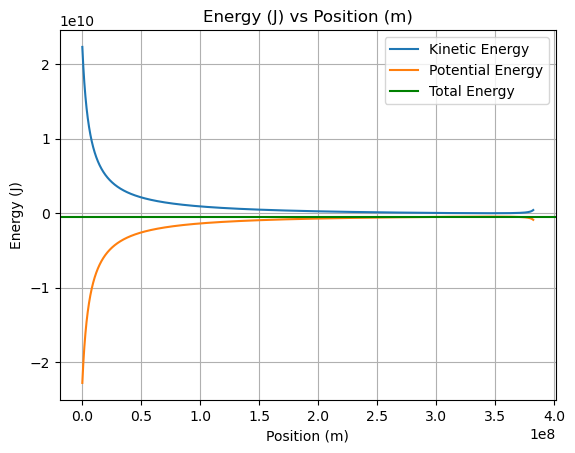

In [172]:
plt.plot(y,KE, label = 'Kinetic Energy')
plt.plot(y,unet1,label = 'Potential Energy')
plt.ylabel('Energy (J)')
plt.xlabel('Position (m)')
plt.title('Energy (J) vs Position (m)')
plt.axhline(pnr, color = 'green', label = 'Total Energy')
plt.legend()
plt.grid()

In [173]:
print(min(KE))

0.0


In [174]:
v1 = np.sqrt(2 * KE / mr) 
t2 = np.arange(0,1e7,0.1)
minv1 = max(v1)
print('The minimum velocity is ', max(v1),' (m /s) @ 50000 (m)')

The minimum velocity is  11071.013907792289  (m /s) @ 50000 (m)


In [175]:
def KE(pos):
    l = -unet(pos)
    return l

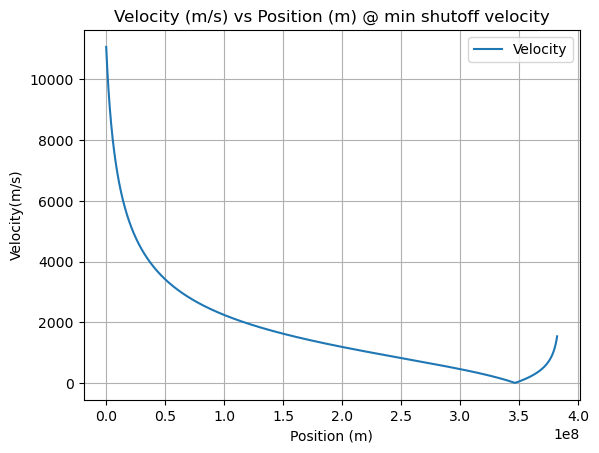

In [176]:
plt.plot(y,v1, label = 'Velocity')
plt.ylabel('Velocity(m/s)')
plt.xlabel('Position (m)')
plt.title('Velocity (m/s) vs Position (m) @ min shutoff velocity')
plt.legend()
plt.grid()

In [177]:
# Creates simulation to when velocity @ 50 km is v0
dt1 = 0.1 # s
t1 = np.arange(0,1e7,dt1)
v2 = np.zeros(len(t1))
v2[0] = vo
y1 = np.zeros(len(t1))
y1[0] = 50000
a = 0
b = 0
while (v2[b] > 0 and (rem - a) > 0):
    v2[b+1] = v2[b] + (fg(y1[b])/mr)*dt1
    y1[b+1] = y1[b] + v2[b]*dt1 + 0.5*(fg(y1[b])/mr)*dt1*dt1
#    print(y1[b])
    a = y1[b+1]
#    print(b)
#    print('Pos ',y1[b])
#    print('Velocity ', v2[b])
#    print('accel', fg(y1[b])/mr)
    b += 1
#    dt1 += dt1
 #   print(v2[b])
    

Based on this data, our craft made it to the moon [true] and did not fall back to earth [true]. However, at the rate of speed  good luck trying to stop!


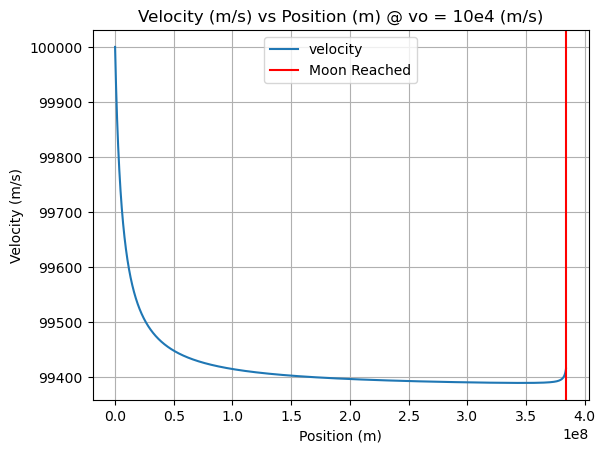

In [178]:
plt.plot(y1[0:b],v2[0:b], label = 'velocity')
plt.axvline(rem, color = 'red', label = 'Moon Reached')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Position (m)')
plt.title('Velocity (m/s) vs Position (m) @ vo = 10e4 (m/s)')
plt.legend()
plt.grid()
print('Based on this data, our craft made it to the moon [true] and did not fall back to earth [true]. However, at the rate of speed',
       ' good luck trying to stop!')

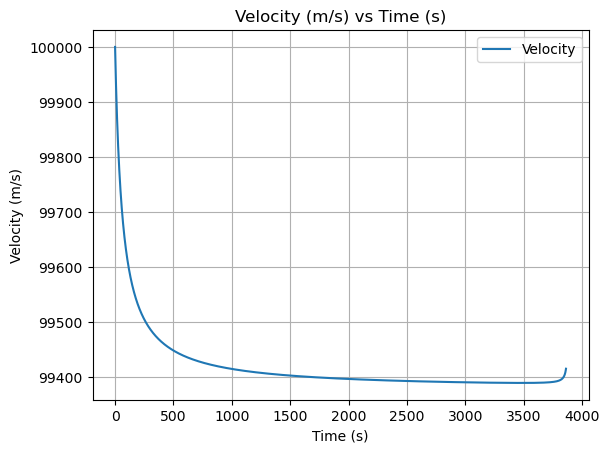

In [179]:
plt.plot(t1[0:b],v2[0:b], label = 'Velocity')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Velocity (m/s) vs Time (s)')
plt.legend()
plt.grid()

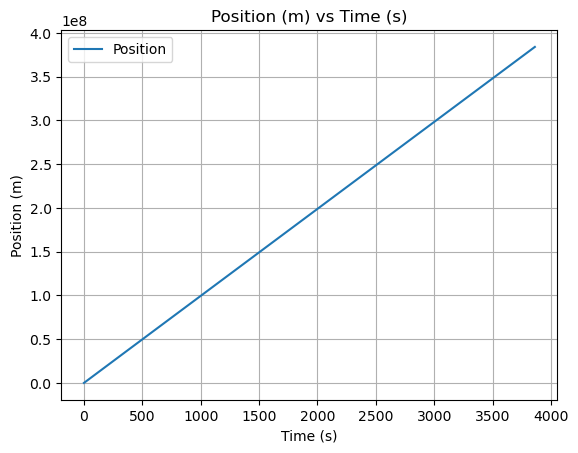

In [180]:
plt.plot(t1[0:b],y1[0:b], label = 'Position')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.title('Position (m) vs Time (s)')
plt.legend()
plt.grid()

In [181]:
# Defines KE,UE,TE for simulation with new velocity
KE1 = 0.5*mr*v2**2
UE1 = unet(y1)
TE1 = KE1[0:b] + UE1[0:b]
print(min(v2[0:b]))
print(b*dt1)

99389.68726744407
3861.9


This graph shows that @ our starting velocity, our potential gravity from either of the planets are negligble w/ all our total energy residing in our kinetic energy.


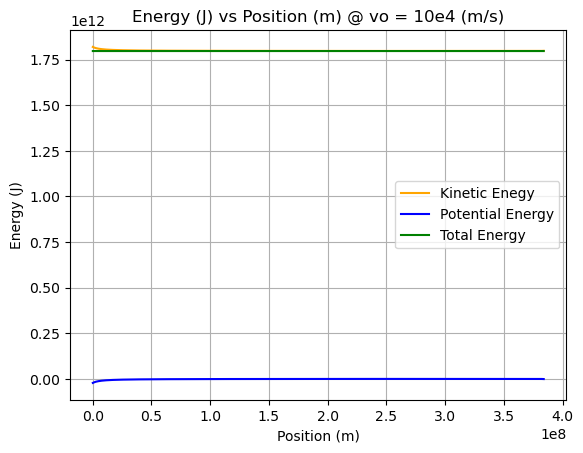

In [182]:
plt.plot(y1[0:b],KE1[0:b], color = 'orange',label = 'Kinetic Enegy')
plt.plot(y1[0:b],UE1[0:b], color = 'blue', label = 'Potential Energy')
plt.plot(y1[0:b],TE1[0:b], color = 'green', label = 'Total Energy')
plt.ylabel('Energy (J)')
plt.xlabel('Position (m)')
plt.title('Energy (J) vs Position (m) @ vo = 10e4 (m/s)')
plt.legend()
plt.grid()
print('This graph shows that @ our starting velocity, our potential gravity from either of the planets are negligble w/ all our',
     'total energy residing in our kinetic energy.')

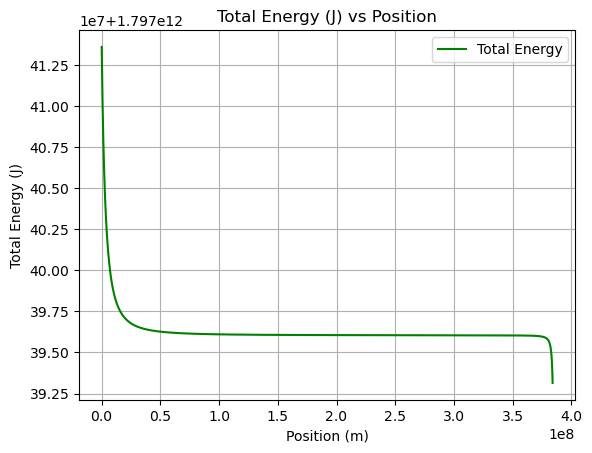

In [183]:
plt.plot(y1[0:b],TE1[0:b],color = 'green', label = 'Total Energy')
plt.ylabel('Total Energy (J)')
plt.xlabel('Position (m)')
plt.title('Total Energy (J) vs Position')
plt.legend()
plt.grid()

In [184]:
# To prove this data is accurate, we can find how much energy is lost or gained
print('The total energy lost(-) or gained (+) is ', ((TE1[0]/TE1[b-1])-1)* 100, '%')

The total energy lost(-) or gained (+) is  0.0011377487219910165 %


In [185]:
# Determining Length of Time to reach moon ast 10% more than the min
# By using our while loop that determines velocity and position, we can determine how many iteriations of time (dt) it takes to
# reach the moon given our 10% more starting velocity

dt1 = 0.1 # s
t1 = np.arange(0,1e7,dt1)
v2 = np.zeros(len(t1))
v2[0] = max(v1) * 1.10 # Increasing our starting velocity
y1 = np.zeros(len(t1))
y1[0] = 50000
a = 0
b = 0
while (v2[b] > 0 and (rem - a) > 0):
    v2[b+1] = v2[b] + (fg(y1[b])/mr)*dt1
    y1[b+1] = y1[b] + v2[b]*dt1 + 0.5*(fg(y1[b])/mr)*dt1*dt1
#    print(y1[b])
    a = y1[b+1]
#    print(b)
#    print('Pos ',y1[b])
 #   print('Velocity ', v2[b])
#    print('accel', fg(y1[b])/mr)
    b += 1
#    dt1 += dt1
 #   print(v2[b])
    

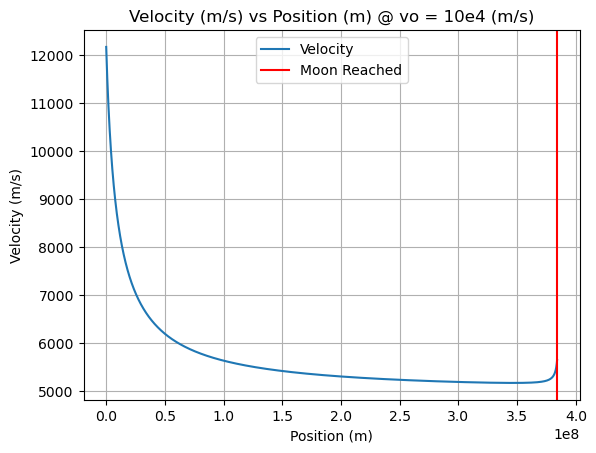

In [186]:
plt.plot(y1[0:b],v2[0:b], label = 'Velocity')
plt.axvline(rem, color = 'red', label = 'Moon Reached')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Position (m)')
plt.title('Velocity (m/s) vs Position (m) @ vo = 10e4 (m/s)')
plt.legend()
plt.grid()

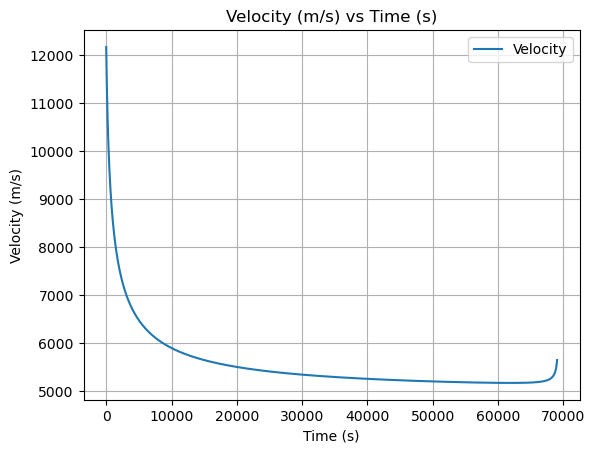

In [187]:
plt.plot(t1[0:b],v2[0:b], label = 'Velocity')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Velocity (m/s) vs Time (s)')
plt.legend()
plt.grid()

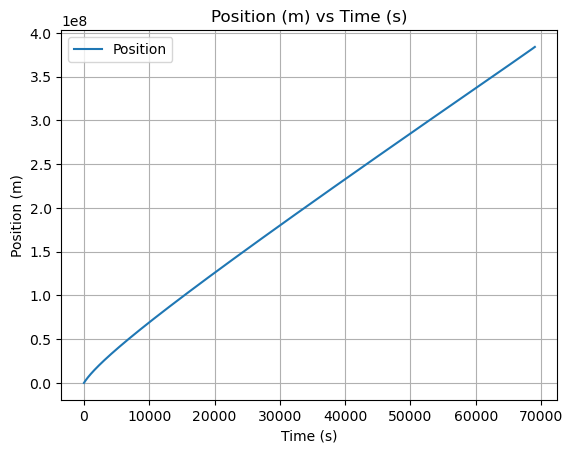

In [188]:
plt.plot(t1[0:b],y1[0:b], label = 'Position')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.title('Position (m) vs Time (s)')
plt.legend()
plt.grid()

In [189]:
# Our time taken to reach the moon will equal our indexeing variable (b) times our change in time (dt1)
tm = b * dt1
print('It takes the rocket',(tm/60/60/24), 'days to reach the moon')

It takes the rocket 0.7990972222222222 days to reach the moon


In [190]:
# Three checks for my numerical simulation that I used through this entire process are using asymptotes and graphically comparing
# /relating different  sets of data, inputting them commenting out print statesments to check values over different iterations, 
# and manually checking what data points "should be " given my parameters

#1) For me, looking at my different arrays graphically and comparing them with others that have a relationship helps me understand
#   how my arrays propagate. For example, if I know theoretically that my pnr will occur @ max(potential energy), I can add in a
#   asymptote at that value and see that my potential energy will increase to that point then fall of. Relating then to kinetic
#   energy, I know that at my point of no return KE = 0 which I can then compare to my graphical data for kinetic energy
#2) The by far most challenging part of this assignment for me was the final simulation given a engine cut-off velocity of the 
#   rocket. Leaving these print statements and commented out lines of code, I can print out each value at every iteration to see
#   where my values started to become unreallistic. 
#3) Even with my data being printed out at every iterations, its always good to double check the math by hand which could lead to
#   solving the mystery of your problem. Throughout this entire experiement, I double checked values by typing them into my calc
#   as well as researching (google-ing) what these values should look like given prior results of other experiements. 
#
#   4?) One of the most important things that I like to write in my code to double check my line of thinking is to comment in 
#       how my formulas or methods were derived.  